# Statistical Process Control: Shewhart Chart

This text explains how to a Shewhart chart can be set up and used.

# Loading modules

Loading the modules we need throughout the notebook and fine-tuning the browser display:

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2500px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
import numpy 
import pandas
import os
import sys
import time
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('..')

# Loading data

As an example, we use data from a sensor ageing data repository.  (v1.0.2) [[Zenodo]](https://doi.org/10.5281/zenodo.3229195). Make sure you have downloaded the file potential_rowB.zip, unzip the contents into a folder of your liking. Then, make sure the folder path in the following cell matches the folder you have chosen:

In [3]:
strFolder = 'C:/G/data/sensorageing/potential_rowB/'

The next lines execute a productivity checks on each data point and select those data point that satisfy these checks. To enable use of the productivity check, we load all data in a string format. This avoids automatic conversions which may mask some issues with the data.

In [4]:
filename  = Path(strFolder+'rowB_potential_day332.csv')
dfStrData = pandas.read_csv(filepath_or_buffer=filename,delimiter  =';',header =0,dtype=str)
dfStrData.head()

date_time         T1b         T2b         T3b         T4b  \
0  2017.08.31 00:00:01   30.400000    2.700000   -9.300000   48.599998   
1  2017.08.31 00:00:02   30.300001    2.700000   -9.300000   48.599998   
2  2017.08.31 00:00:03   30.400000    2.600000   -9.400000   48.599998   
3  2017.08.31 00:00:04   30.400000    2.700000   -9.400000   48.599998   
4  2017.08.31 00:00:05   30.300001    2.700000   -9.300000   48.599998   

  Unnamed: 5  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [5]:
from basic.production import datetimecheck
from basic.typical import typicalitycheck
from basic.production import numericcheck

CheckDT      = datetimecheck(DateTimeFormat='%Y.%m.%d %H:%M:%S')
CheckNUM = numericcheck(NumberFormat='float')

xCheckDT , dtDateTime =  CheckDT(DateTimeEntry=dfStrData['date_time'])
xCheckNUM , rValue = CheckNUM(NumberEntry=dfStrData['T4b'])

xInclude = numpy.logical_and(xCheckDT,xCheckNUM)

In [6]:
dtDateTime=numpy.array(dtDateTime)
rValue=numpy.array(rValue)
dtDateTime=dtDateTime[xInclude]
ytil=rValue[xInclude]

# Phase I: Compute location and spread

We plot the first 10000 data points, which will be used to identify the model (location / spread)

C:\ProgramData\Anaconda3_1\envs\ATK\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


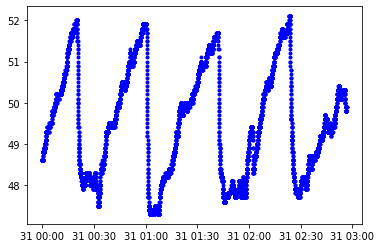

In [7]:
N1 = 10000

plt.plot(dtDateTime[0:N1],ytil[0:N1],'b.')

We compute the location (in this case: the median) and the spread (in this case: median absolute deviation)

In [8]:
mu_hat = numpy.median(ytil[0:N1])
sigma_hat = numpy.median(numpy.abs(ytil[0:N1]-mu_hat))

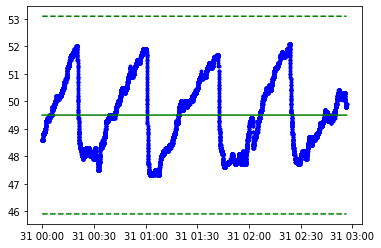

In [9]:
plt.plot(dtDateTime[0:N1],ytil[0:N1],'b.')
plt.plot(dtDateTime[0:N1],mu_hat*numpy.ones(N1),'g-')
plt.plot(dtDateTime[0:N1],(mu_hat+3*sigma_hat)*numpy.ones(N1),'g--')
plt.plot(dtDateTime[0:N1],(mu_hat-3*sigma_hat)*numpy.ones(N1),'g--')

# Phase II: Predict + Compare

We now predict the future as the 3-$\sigma$ interval around the mean and compare this prediction with new data points as they arrive:

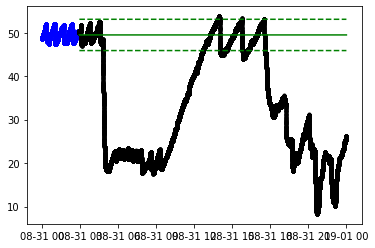

In [10]:
N2=len(dtDateTime)-N1

plt.plot(dtDateTime[0:N1],ytil[0:N1],'b.')
plt.plot(dtDateTime[N1:],ytil[N1:],'k.')
plt.plot(dtDateTime[N1:],mu_hat*numpy.ones(N2),'g-')
plt.plot(dtDateTime[N1:],(mu_hat+3*sigma_hat)*numpy.ones(N2),'g--')
plt.plot(dtDateTime[N1:],(mu_hat-3*sigma_hat)*numpy.ones(N2),'g--')
